In [1]:
# import all  necessairy lbs:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')




In [2]:
df=pd.read_csv('/content/stroke_data.csv',sep=';')

In [3]:
df. head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.columns.to_list()


['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [5]:
df.shape

(5110, 12)

In [6]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [7]:
df.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [8]:
num_categorical = len(df.select_dtypes(include=['object']).columns)
num_numerical = len(df.select_dtypes(include=['int64', 'float64']).columns)
print("Number of categorical columns:", num_categorical)
print("Number of numerical columns:", num_numerical)


Number of categorical columns: 5
Number of numerical columns: 7


In [9]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [10]:
df.iloc[:,1]

0         Male
1       Female
2         Male
3       Female
4       Female
         ...  
5105    Female
5106    Female
5107    Female
5108      Male
5109    Female
Name: gender, Length: 5110, dtype: object

In [11]:
data=df.drop('id', axis=1, inplace=False)

In [12]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [13]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [15]:
data.isna()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False


In [16]:
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [17]:
data.duplicated().sum()

0

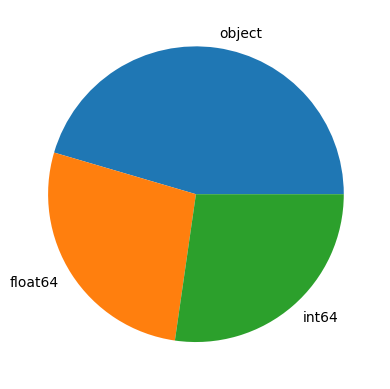

In [18]:
data.dtypes.value_counts().plot.pie()
plt.show()

##### we can conclure that target is binary classified 0 or 1 values

In [19]:
data[['stroke']]

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
5105,0
5106,0
5107,0
5108,0


In [20]:
data.iloc[:,10]

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [21]:
df['bmi'].mode()

0    28.7
Name: bmi, dtype: float64

In [22]:
data['bmi'].mode()

0    28.7
Name: bmi, dtype: float64

In [23]:
data['bmi'].mean()

28.893236911794666

In [24]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [25]:
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())


In [26]:
data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [27]:
data['bmi'].head()

0    36.600000
1    28.893237
2    32.500000
3    34.400000
4    24.000000
Name: bmi, dtype: float64

In [28]:
# The percentage of each class in the column "stroke"
(data["stroke"].value_counts()/(data.shape[0]))*100

0    95.127202
1     4.872798
Name: stroke, dtype: float64

#### check type of each columns

In [29]:
for i ,col in enumerate(data.dtypes):
    print(i,col)

0 object
1 float64
2 int64
3 int64
4 object
5 object
6 object
7 float64
8 float64
9 object
10 int64


###  Before checking boxplot and other features we need zto split data into two dataframe categorical and numerical Features

In [30]:
num_cols =[]
cat_cols =[]
# Loop through the columns and categorize them
for column in data.columns:
    if data[column].dtype == 'object':
        cat_cols.append(column) # add the column name in categorical_columns if the column type is 'object'
    else:
        num_cols.append(column)

In [31]:
num_cols

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

In [32]:
data[["stroke"]]

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
5105,0
5106,0
5107,0
5108,0


In [33]:
numerical_data=data[num_cols]
categorical_data=data[cat_cols]


In [34]:
numerical_data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.600000,1
1,61.0,0,0,202.21,28.893237,1
2,80.0,0,1,105.92,32.500000,1
3,49.0,0,0,171.23,34.400000,1
4,79.0,1,0,174.12,24.000000,1
...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0
5106,81.0,0,0,125.20,40.000000,0
5107,35.0,0,0,82.99,30.600000,0
5108,51.0,0,0,166.29,25.600000,0


In [35]:
categorical_data

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


In [36]:
# Extract class for each column
for col in data.select_dtypes('object'):
    print(col,data[col].unique())

gender ['Male' 'Female' 'Other']
ever_married ['Yes' 'No']
work_type ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type ['Urban' 'Rural']
smoking_status ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [37]:
for col in data.select_dtypes('int'):
    print(col,data[col].unique())

hypertension [0 1]
heart_disease [1 0]
stroke [1 0]


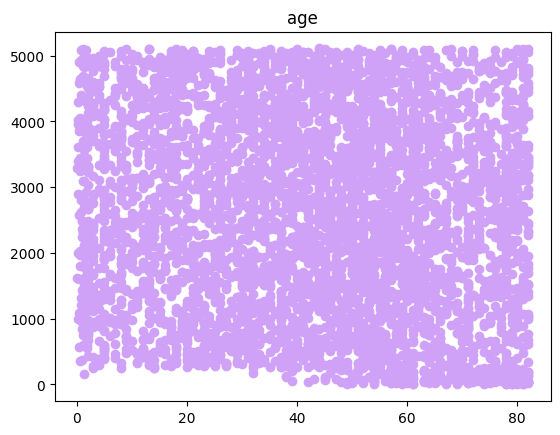

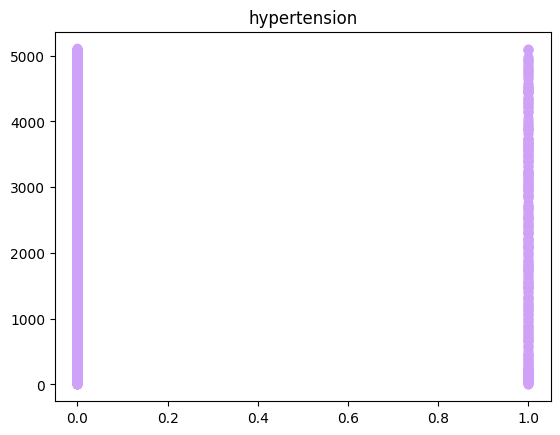

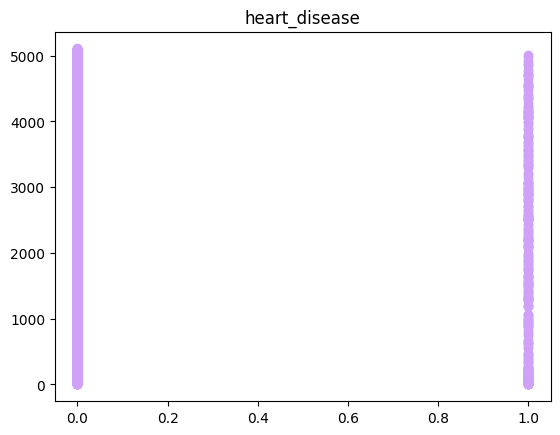

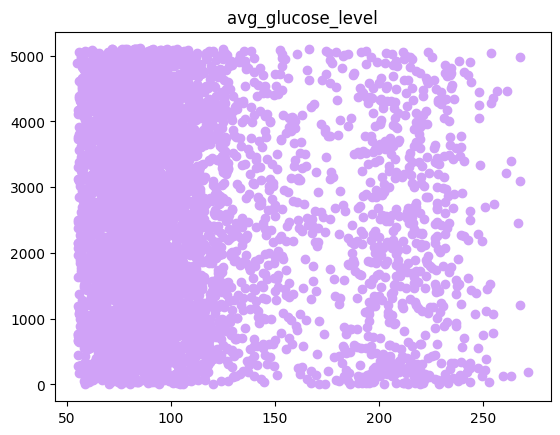

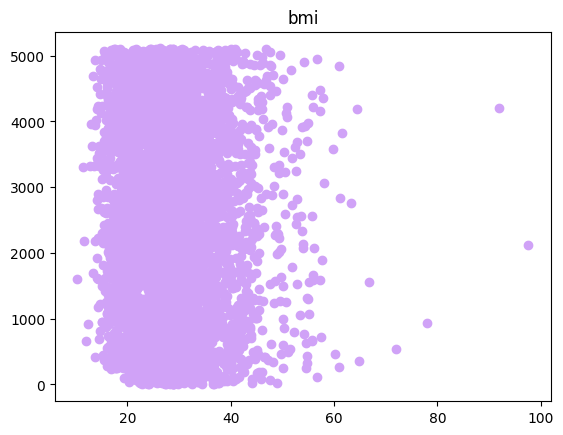

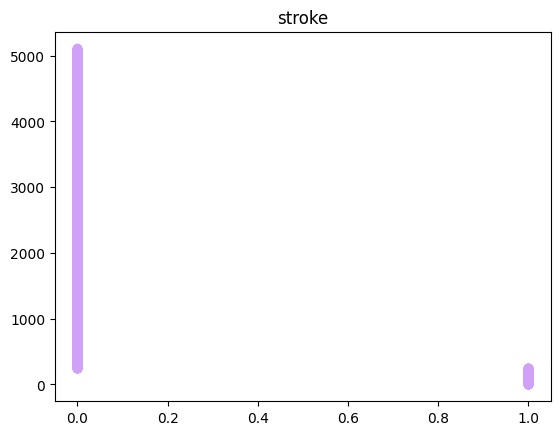

In [38]:
# starting with scatter plot
for column in numerical_data.columns: # looping through all our data columns
    x = numerical_data[column] # the x content
    y = range(len(data)) # the y content
    plt.scatter(x, y, c="#D0A2F7") # c is the color
    plt.title(column)
    plt.show()

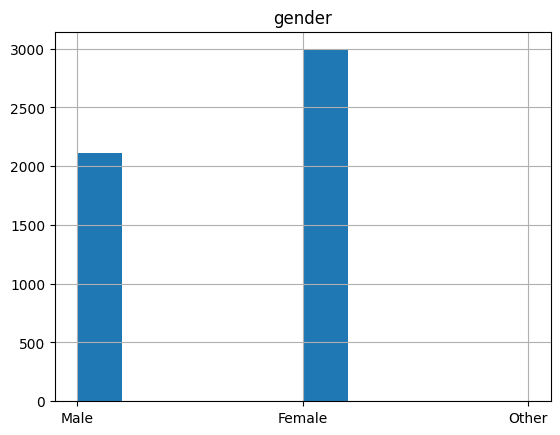

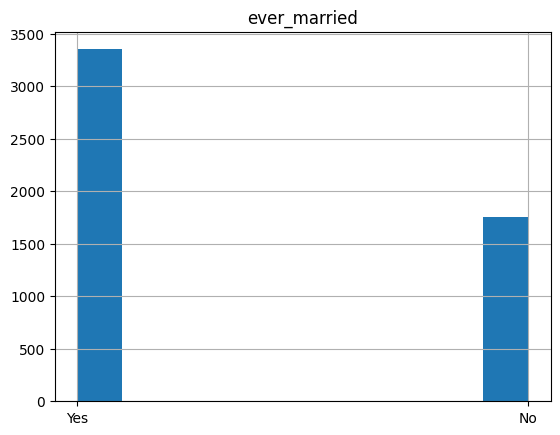

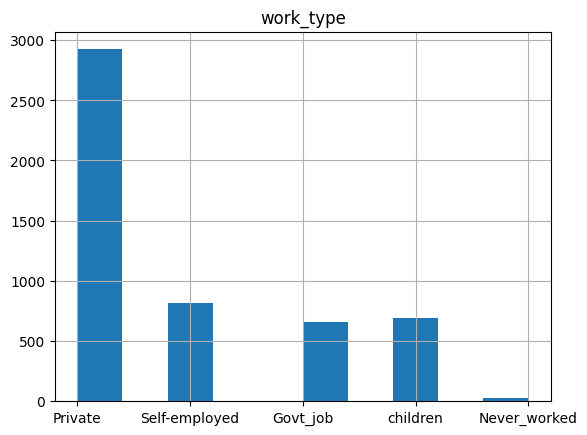

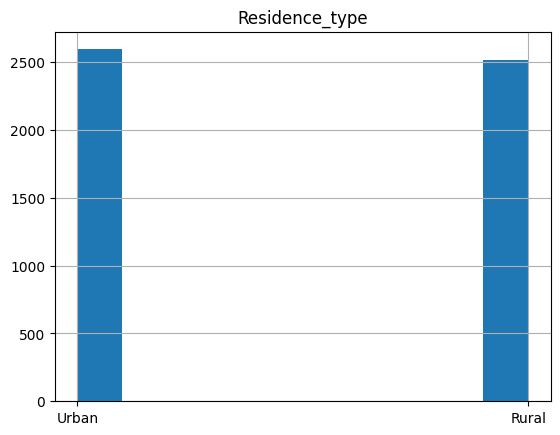

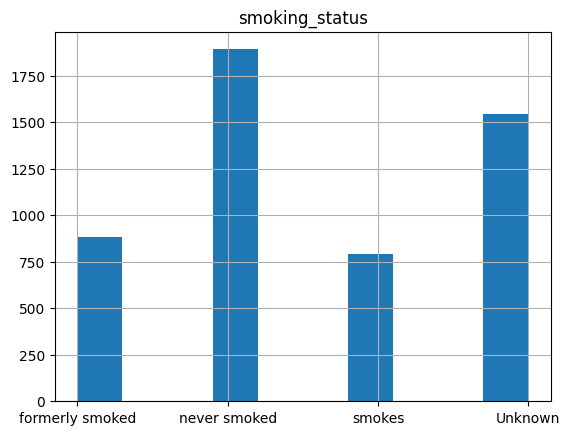

In [39]:
for col in categorical_data:
    categorical_data[col].hist()
    plt.title(col)
    plt.show()

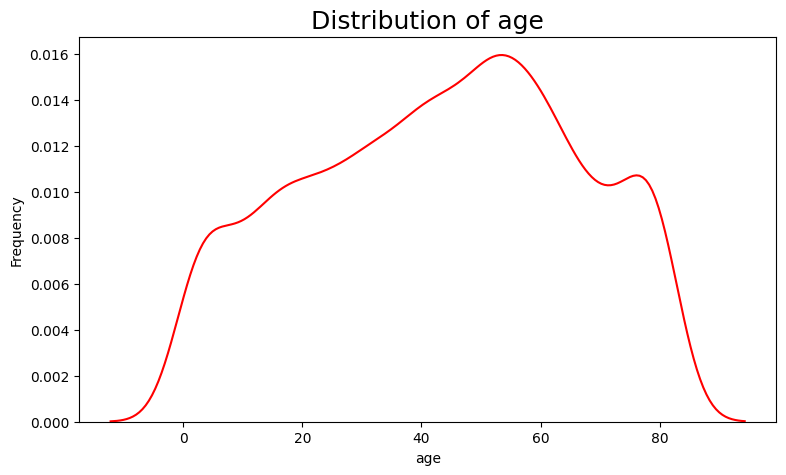

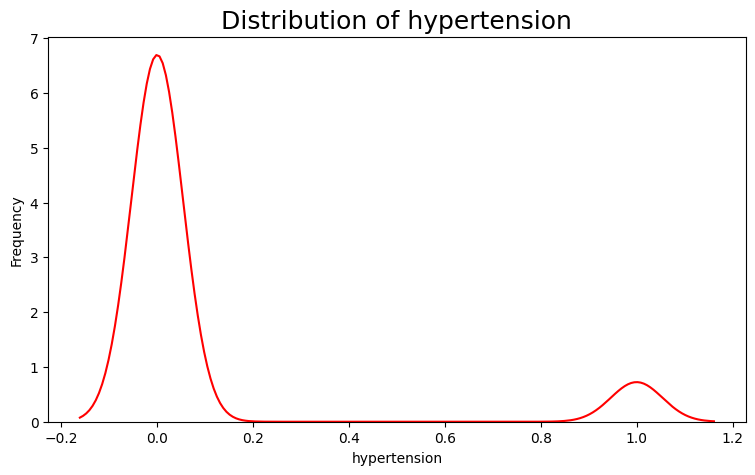

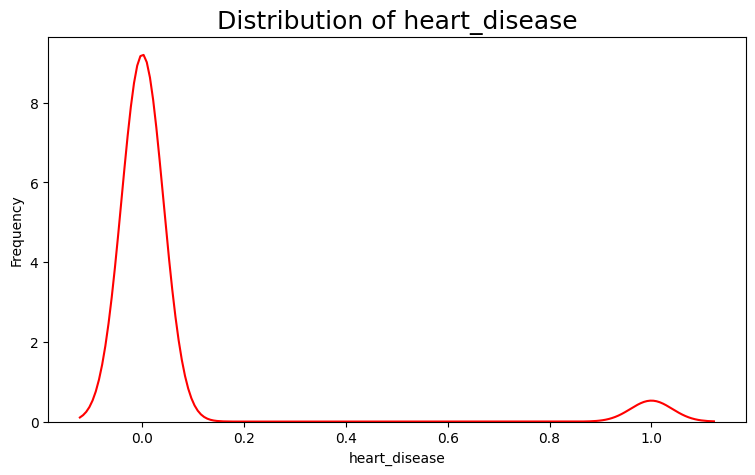

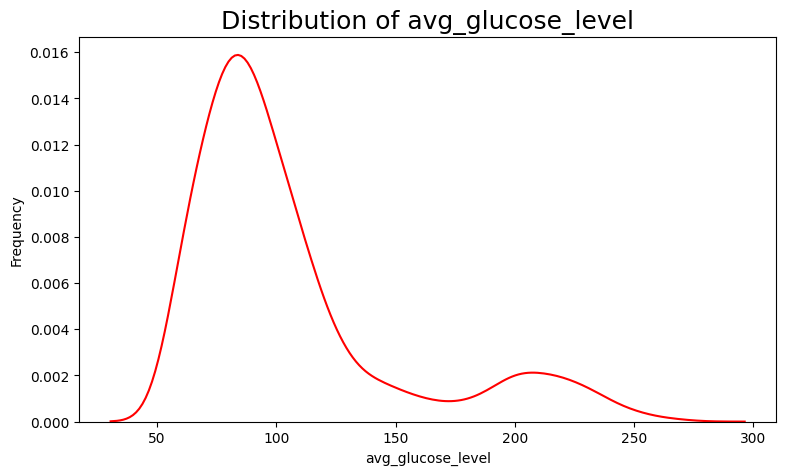

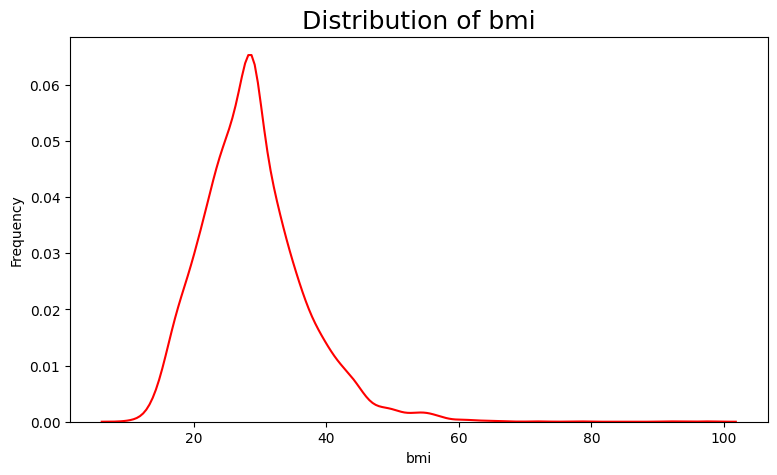

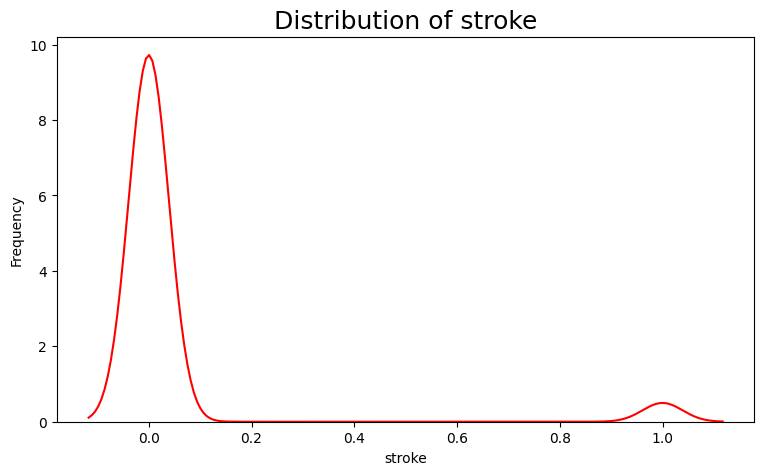

In [40]:
for col in numerical_data:
    plt.figure(figsize = (9,5))
    sns.kdeplot(numerical_data[col], color="red", label="stroke")
    plt.title('Distribution of '+col, fontsize = 18)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

### create a boxplot to check outliers values

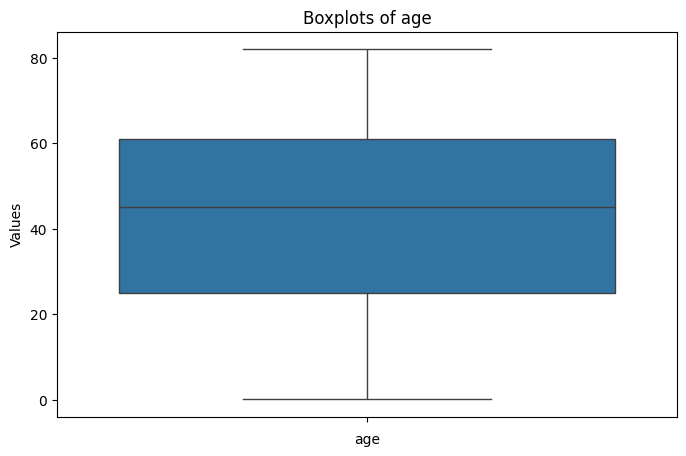

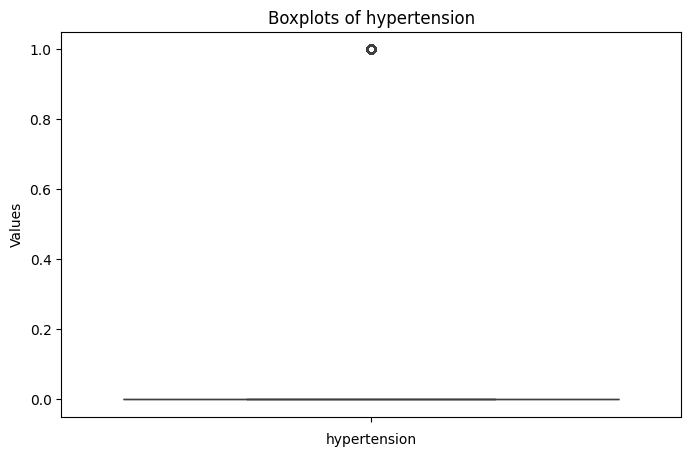

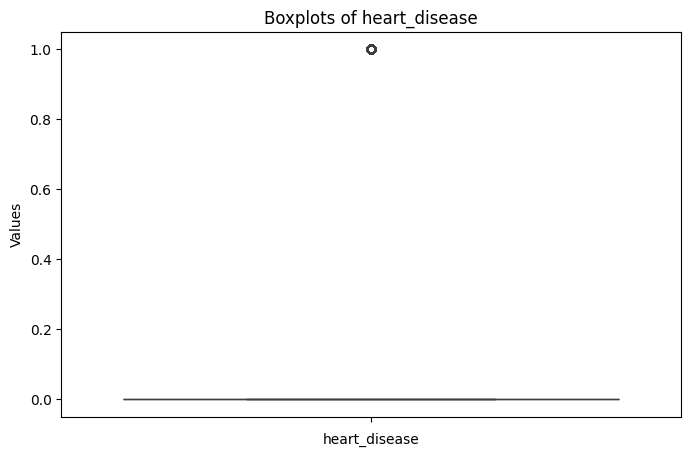

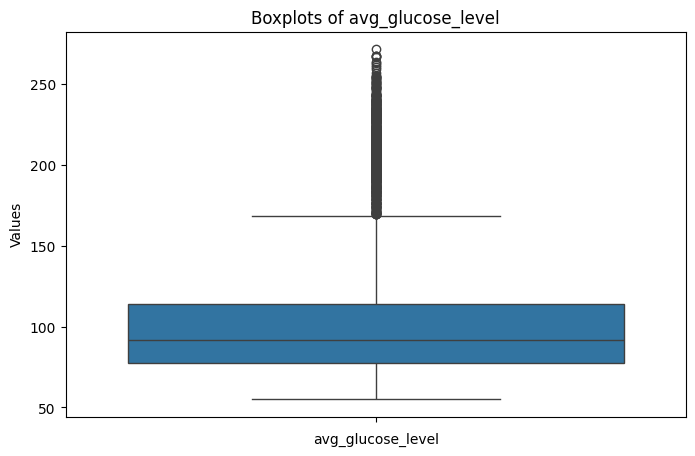

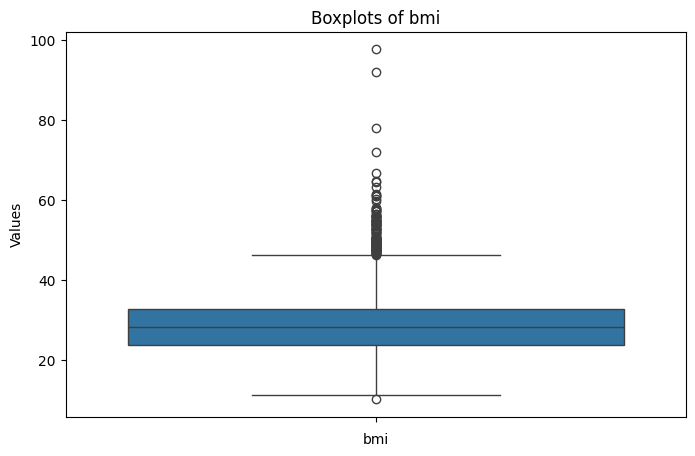

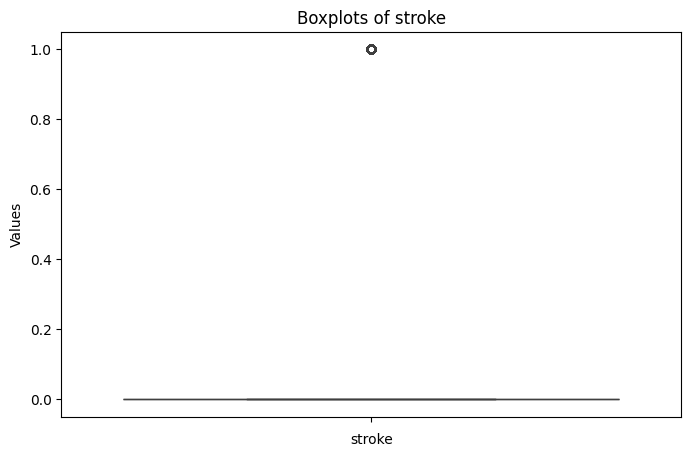

In [41]:
for col in numerical_data:
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.boxplot(data=data[col], ax=ax)
    ax.set_title('Boxplots of '+col)
    ax.set_xlabel(col)
    ax.set_ylabel('Values')
    plt.show()

In [42]:
categorical_data.columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

### Encoding Categorical-Data

In [43]:
Categorical_dummies = categorical_data[["gender","work_type","smoking_status"]]


In [44]:
Categorical_dummies.head()


,gender,work_type,smoking_status
0,Male,Private,formerly smoked
1,Female,Self-employed,never smoked
2,Male,Private,never smoked
3,Female,Private,smokes
4,Female,Self-employed,never smoked


In [45]:
categorical_LabelEncoder = categorical_data.drop(columns=["gender","work_type","smoking_status"], axis=1)


In [46]:
categorical_LabelEncoder.head()


,ever_married,Residence_type
0,Yes,Urban
1,Yes,Rural
2,Yes,Rural
3,Yes,Urban
4,Yes,Rural


#### ENcoding features with 2 class with labelencoder and the other with getdummies

In [47]:
from sklearn.preprocessing import LabelEncoder


In [48]:
labelencoder=LabelEncoder()


In [49]:
# Transform the categorical data with 2 classes to numerical using LabelEncoder
for col in categorical_LabelEncoder:
    categorical_LabelEncoder[col] = labelencoder.fit_transform(categorical_LabelEncoder[col])

In [50]:
categorical_LabelEncoder.head()


,ever_married,Residence_type
0,1,1
1,1,0
2,1,0
3,1,1
4,1,0


In [51]:
for col in Categorical_dummies:
    print(col,Categorical_dummies[col].unique())

gender ['Male' 'Female' 'Other']
work_type ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
smoking_status ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [52]:
Categorical_dummies = pd.get_dummies(Categorical_dummies,drop_first=True)


In [53]:
Categorical_dummies.shape

(5110, 9)

In [54]:
Categorical_dummies

,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0,0,1,0,0,1,0,0
1,0,0,0,0,1,0,0,1,0
2,1,0,0,1,0,0,0,1,0
3,0,0,0,1,0,0,0,0,1
4,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
5105,0,0,0,1,0,0,0,1,0
5106,0,0,0,0,1,0,0,1,0
5107,0,0,0,0,1,0,0,1,0
5108,1,0,0,1,0,0,1,0,0


In [55]:
Categorical_dummies.columns



Index(['gender_Male', 'gender_Other', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [56]:
categorical_data = pd.concat([categorical_LabelEncoder,Categorical_dummies],axis=1)


In [57]:
categorical_data.head()


,ever_married,Residence_type,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,1,1,0,0,1,0,0,1,0,0
1,1,0,0,0,0,0,1,0,0,1,0
2,1,0,1,0,0,1,0,0,0,1,0
3,1,1,0,0,0,1,0,0,0,0,1
4,1,0,0,0,0,0,1,0,0,1,0


In [58]:
categorical_data.dtypes

ever_married                      int64
Residence_type                    int64
gender_Male                       uint8
gender_Other                      uint8
work_type_Never_worked            uint8
work_type_Private                 uint8
work_type_Self-employed           uint8
work_type_children                uint8
smoking_status_formerly smoked    uint8
smoking_status_never smoked       uint8
smoking_status_smokes             uint8
dtype: object

## Outliers Detection

### custem Method

In [59]:
# Calculate Q1 and Q3
Q1 = data["stroke"].quantile(0.25)
Q3 = data["stroke"].quantile(0.75)

In [60]:
# Calculate IQR
IQR = Q3 - Q1

In [61]:
# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

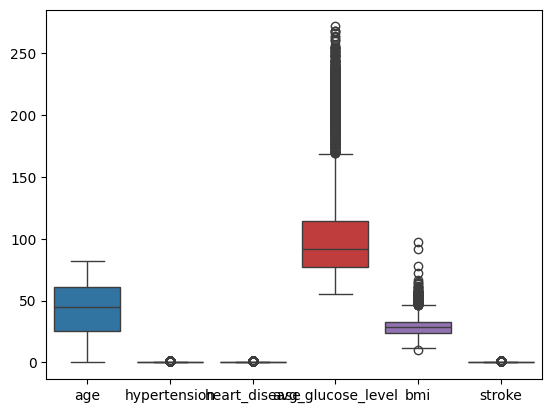

<Figure size 1800x1800 with 0 Axes>

In [62]:
sns.boxplot(data=numerical_data)
plt.figure(figsize=(18,18))
plt.show()


# Outlierss :

In [63]:
Q1 = numerical_data["avg_glucose_level"].quantile(0.25)
Q3 = numerical_data["avg_glucose_level"].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 4 * IQR

dataCleaned = numerical_data[(numerical_data["avg_glucose_level"] <= upper_bound)|(numerical_data["avg_glucose_level"] >= upper_bound)]

In [64]:
# Reset the index
dataCleaned = dataCleaned.reset_index(drop=True)



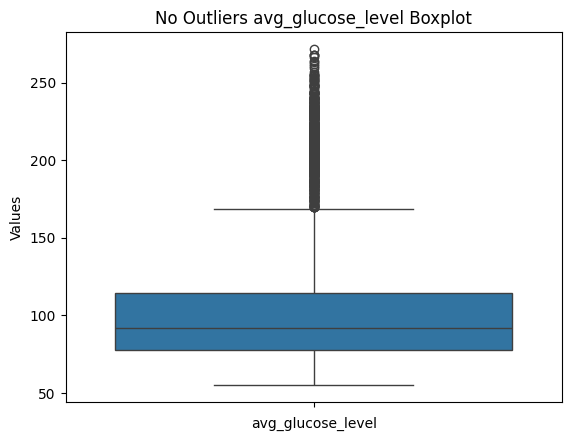

In [65]:
# Boxplot of "avg_glucose_level" without outliers
sns.boxplot(data=dataCleaned["avg_glucose_level"]);
plt.xlabel("avg_glucose_level")
plt.ylabel("Values")
plt.title("No Outliers avg_glucose_level Boxplot");

In [66]:
# romove outliers from the bmi column
Q1 = numerical_data["bmi"].quantile(0.25)
Q3 = numerical_data["bmi"].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 4 * IQR
dataCleaned2 = numerical_data[(numerical_data["bmi"] <= upper_bound)|(numerical_data["bmi"] >= upper_bound)]

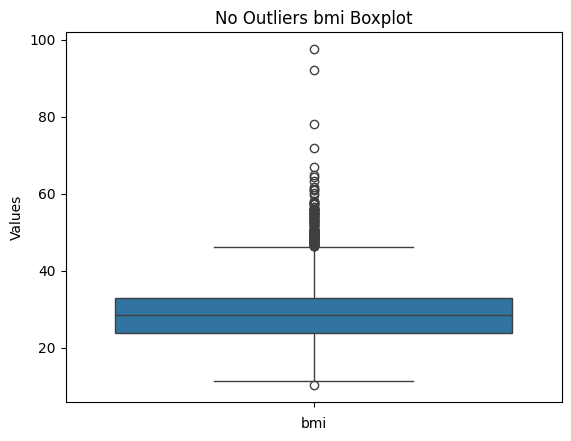

In [67]:
# ibm column after removing outliers
sns.boxplot(data=dataCleaned2["bmi"]);
plt.xlabel("bmi")
plt.ylabel("Values")
plt.title("No Outliers bmi Boxplot");



In [68]:
Finaldata=pd.get_dummies(data,drop_first=True)

In [69]:
Finaldata

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.893237,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0,0,0,1,0,1,0,0,1,0,1,0
5106,81.0,0,0,125.20,40.000000,0,0,0,1,0,0,1,0,1,0,1,0
5107,35.0,0,0,82.99,30.600000,0,0,0,1,0,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.600000,0,1,0,1,0,1,0,0,0,1,0,0


In [70]:
Finaldata['stroke'].values

array([1, 1, 1, ..., 0, 0, 0])

In [71]:
finaldata=Finaldata

### Scaler :

####  Stander scaler & MinMax-scaler

In [72]:
from sklearn.preprocessing import StandardScaler ,MinMaxScaler
sc=StandardScaler()
Finaldata=sc.fit_transform(Finaldata)


In [73]:
Finaldata

array([[ 1.05143428, -0.32860186,  4.18503199, ...,  2.1849511 ,
        -0.7667743 , -0.42731326],
       [ 0.78607007, -0.32860186, -0.2389468 , ..., -0.45767615,
         1.30416474, -0.42731326],
       [ 1.62639008, -0.32860186,  4.18503199, ..., -0.45767615,
         1.30416474, -0.42731326],
       ...,
       [-0.36384151, -0.32860186, -0.2389468 , ..., -0.45767615,
         1.30416474, -0.42731326],
       [ 0.34379639, -0.32860186, -0.2389468 , ...,  2.1849511 ,
        -0.7667743 , -0.42731326],
       [ 0.03420481, -0.32860186, -0.2389468 , ..., -0.45767615,
        -0.7667743 , -0.42731326]])

In [74]:
std=StandardScaler()
finaldata=sc.fit_transform(finaldata)
finaldata


array([[ 1.05143428, -0.32860186,  4.18503199, ...,  2.1849511 ,
        -0.7667743 , -0.42731326],
       [ 0.78607007, -0.32860186, -0.2389468 , ..., -0.45767615,
         1.30416474, -0.42731326],
       [ 1.62639008, -0.32860186,  4.18503199, ..., -0.45767615,
         1.30416474, -0.42731326],
       ...,
       [-0.36384151, -0.32860186, -0.2389468 , ..., -0.45767615,
         1.30416474, -0.42731326],
       [ 0.34379639, -0.32860186, -0.2389468 , ...,  2.1849511 ,
        -0.7667743 , -0.42731326],
       [ 0.03420481, -0.32860186, -0.2389468 , ..., -0.45767615,
        -0.7667743 , -0.42731326]])

We should mention that while most of our data features exhibit a normal distribution, our focus should be on using StandardScaler. Additionally, it's crucial to acknowledge that normalization is sensitive to outliers, requiring careful consideration in our preprocessing approach